#### Exercise 1
Summing vectors in series to generate a trajectory through space

Suppose $\mathbf{x}_0 = (1,0)$. Write a $\mathbf{for}$ loop that performs a series of vector addtions according to the following rule:

$\mathbf{x}_{t+1} = \mathbf{x}_{t}+\lambda \mathbf{x}^{\perp}_{t}$

where $\mathbf{x}^{\perp}$ is perpendicular to $\mathbf{x}$ and $\lambda$ is called the "step-size".

In two dimensions, to obtain $\mathbf{x}^{\perp}$ simply swap vector elements, then negate the first element:

$\mathbf{x}^{\perp} = \left (-x_2, x_1 \right )$

Start by iterating for 10,000 steps, with a step size of 0.2. What trajectory is traced out by this procedure? How will the tajectory change as the step size is reduced?

$\textit{Hint}$: your solution should look like this: https://www.youtube.com/watch?v=FdCy6MGOVfw

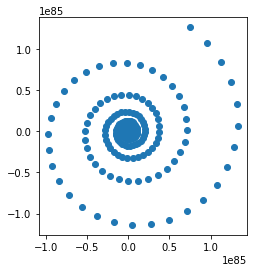

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#initialize variables
x = np.array([1,0]) #x0
step = 0.2
numSteps = 10000
trajectory = np.zeros((numSteps,2))

#steps
for i in range(0,numSteps):
    x = x + np.array([-x[1],x[0]]) * step
    trajectory[i,:] = x

#plot trajectory
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(trajectory[:,0],trajectory[:,1])

#### Exercise 2
Use quiver to plot $\mathbf{x}$, $\mathbf{y}$, and the vector $\mathbf{z}=\mathbf{y}\dfrac{\mathbf{x}\cdot \mathbf{y}}{\lvert \lvert \mathbf{y} \rvert \rvert^2}$ for some arbitrary $2D$ vectors $\mathbf{x}$ and $\mathbf{y}$. 

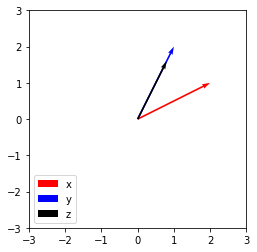

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Example data (must be dtype=float or they will be truncated division)
x = np.array([2,1], dtype='float64')
y = np.array([1,2], dtype='float64')

#Evaluate z
z = y*x.dot(y)/y.dot(y)

#plot the vectors
plt.quiver(*x,angles='xy', scale_units ='xy',scale=1,color='r', label='x')
plt.quiver(*y,angles='xy', scale_units ='xy',scale=1,color='b', label='y')
plt.quiver(*z,angles='xy', scale_units ='xy',scale=1,label='z')

#format the plot
plt.ylim([-3,3])
plt.xlim([-3,3])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='lower left')

#### Exercise 3
Zeros and ones are pretty easy to distinguish because they have very different shapes. Build a hand-coded classifier for ones and sevens, or threes and eights. How much worse is the performance?

OPTIMIZED W
w = (0.86, -0.82)
TRAINING DATA
percentage of correct threes: 0.76
percentage of correct eights: 0.84
total percent correct: 0.80
VALIDATION DATA
percentage of correct threes: 0.81
percentage of correct eights: 0.82
total percent correct: 0.81


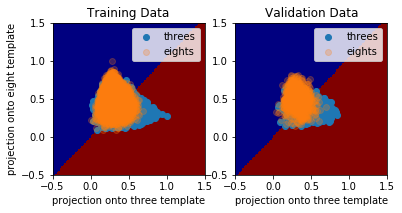

In [3]:
import numpy as np
from loadMNIST import LoadMNIST
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

####################
## DEFINE HELPERS ##
####################

# Define a class for retrieving MNIST data
class MNISTData(object):
    
    def __init__(self,path=os.getcwd()):
        save_stdout = sys.stdout
        sys.stdout = open(os.devnull, "w") #prevent LoadMNIST from printing to stdout
        self.mnist_trn_data = LoadMNIST(path + 'train-images-idx3-ubyte')
        self.mnist_val_data = LoadMNIST(path + 't10k-images-idx3-ubyte')
        self.mnist_trn_label = LoadMNIST(path + 'train-labels-idx1-ubyte')
        self.mnist_val_label = LoadMNIST(path + 't10k-labels-idx1-ubyte')
        sys.stdout = save_stdout #reset stdout
        
    def getTrainingSet(self, val):
        return self.normalizeSet(self.mnist_trn_data[self.mnist_trn_label==val].astype('float32'))
    
    def getValidationSet(self, val):
        return self.normalizeSet(self.mnist_val_data[self.mnist_val_label==val].astype('float32'))
    
    def getSetSize(self, valueSet):
        return valueSet.shape[0]
    
    def getPixelRes(self, valueSet):
        return valueSet.shape[1]
    
    def normalizeSet(self, imageSet):
        imageSet -= np.mean(imageSet, axis=(1,2))[:, np.newaxis, np.newaxis]
        imageSet /= np.sqrt(np.sum(imageSet**2,axis=(1,2)))[:, np.newaxis, np.newaxis]
        return imageSet
    
# Define discriminant function
def discriminant_function(data, weight, bias):
    return (weight.dot(data) + bias) > 0

# Define view class
def view_class(weight_vector, bias, view_bounds=(-.5,1.5), view_res=100):
    ##construct a viewing plane
    X,Y = np.meshgrid(np.linspace(view_bounds[0],view_bounds[1],num=view_res),
                      np.linspace(view_bounds[0],view_bounds[1],num=view_res))
    
    points = np.array([X.ravel(),Y.ravel()]) ##2 x view_res**2
    
    ##evaluate discriminate function
    disc = discriminant_function(points,weight_vector,bias)
    
    ##reshape disc. function values into a matrix and view
    plt.pcolor(X,Y,disc.reshape((view_res,view_res)),cmap='jet')
    plt.gca().set_aspect('equal', adjustable='box')

    
#####################
### RETRIEVE DATA ###
#####################

# Initialize MNIST Data Retrieval class
loader = MNISTData(os.getcwd() + '/MNIST/')

# Retrieve normalized training and validation data
trn_threes = loader.normalizeSet(loader.getTrainingSet(3))
val_threes = loader.normalizeSet(loader.getValidationSet(3))
trn_eights = loader.normalizeSet(loader.getTrainingSet(8))
val_eights = loader.normalizeSet(loader.getValidationSet(8))


#####################
##### TEMPLATES #####
#####################

# Random template selection
three_temp = trn_threes[np.random.randint(0,high=loader.getSetSize(trn_threes))]
eight_temp = trn_eights[np.random.randint(0,high=loader.getSetSize(trn_eights))]

# Reshape the templates and stack them into a matrix
temps = np.array([three_temp.ravel(), eight_temp.ravel()]).T

# Project images onto each of the templates
trn_phi_s_threes = trn_threes.reshape(loader.getSetSize(trn_threes), loader.getPixelRes(trn_threes)**2).dot(temps)
val_phi_s_threes = val_threes.reshape(loader.getSetSize(val_threes), loader.getPixelRes(val_threes)**2).dot(temps)
trn_phi_s_eights = trn_eights.reshape(loader.getSetSize(trn_eights), loader.getPixelRes(trn_eights)**2).dot(temps)
val_phi_s_eights = val_eights.reshape(loader.getSetSize(val_eights), loader.getPixelRes(val_eights)**2).dot(temps)


####################
## GET W and BIAS ##
####################

# brute force optimization of w
num_steps = 100
w_1_range = np.linspace(-1, 1, num=num_steps)
w_2_range = np.linspace(-1, 1, num=num_steps)
b = 0.0
trn_performance = np.zeros([num_steps]*2)
for ii,w1 in enumerate(w_1_range):
    for jj,w2 in enumerate(w_2_range):
        w = np.array([w1, w2])
        three_preds = discriminant_function(trn_phi_s_threes.T, w, b)
        eight_preds = discriminant_function(trn_phi_s_eights.T, w, b)
        trn_three_correct = np.sum(three_preds==True)/float(len(three_preds))
        trn_eight_correct = np.sum(eight_preds==False)/float(len(eight_preds))
        trn_performance[ii,jj] = (trn_three_correct + trn_eight_correct)/2
        
# get the best w
best_idx = np.unravel_index(trn_performance.argmax(), trn_performance.shape)
w = np.array((w_1_range[best_idx[0]],w_2_range[best_idx[1]]))

# display best w
print 'OPTIMIZED W'
print 'w = (%0.2f, %0.2f)' %(w[0], w[1])

######################
# VIEW TRAINING DATA #
######################

# create training data plot
plt.subplot(1,2,1).set_title('Training Data')

# create viewing plot
view_class(w, b)

# display training data points
plt.scatter(trn_phi_s_threes[:,0], trn_phi_s_threes[:,1], label='threes', alpha=1)
plt.scatter(trn_phi_s_eights[:,0], trn_phi_s_eights[:,1], label='eights', alpha=0.25)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('projection onto three template')
plt.ylabel('projection onto eight template')


####################
## TRAINING STATS ##
####################

# make predictions
trn_three_preds = discriminant_function(trn_phi_s_threes.T, w, b)
trn_eight_preds = discriminant_function(trn_phi_s_eights.T, w, b)

# calculate success rate
trn_three_correct = np.sum(trn_three_preds==True)/float(len(trn_three_preds))
trn_eight_correct = np.sum(trn_eight_preds==False)/float(len(trn_eight_preds))
total_correct = (trn_three_correct + trn_eight_correct)/2

# display results
print 'TRAINING DATA'
print 'percentage of correct threes: %0.2f' %(trn_three_correct)
print 'percentage of correct eights: %0.2f' %(trn_eight_correct)
print 'total percent correct: %0.2f' %(total_correct)


########################
# VIEW VALIDATION DATA #
########################

# create validation data plot
plt.subplot(1,2,2).set_title('Validation Data')

# create viewing plot
view_class(w, b)

# display validation data points
plt.scatter(val_phi_s_threes[:,0], val_phi_s_threes[:,1], label='threes', alpha=1)
plt.scatter(val_phi_s_eights[:,0], val_phi_s_eights[:,1], label='eights', alpha=0.25)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('projection onto three template')


####################
# VALIDATION STATS #
####################

# make predictions
val_three_preds = discriminant_function(val_phi_s_threes.T, w, b)
val_eight_preds = discriminant_function(val_phi_s_eights.T, w, b)

# calculate success rate
val_three_correct = np.sum(val_three_preds==True)/float(len(val_three_preds))
val_eight_correct = np.sum(val_eight_preds==False)/float(len(val_eight_preds))
total_correct = (val_three_correct + val_eight_correct)/2

# display results
print 'VALIDATION DATA'
print 'percentage of correct threes: %0.2f' %(val_three_correct)
print 'percentage of correct eights: %0.2f' %(val_eight_correct)
print 'total percent correct: %0.2f' %(total_correct)


#### Exercise 4
In class we constructed a feature space by using a randomly selected image of "1" and "0" as templates. 

Using code in the notebook "DIY_classifier", try to improve the performance of your DIY classifier using a more principled selection of templates. 

*Note*: The strategy is completely up to you. You'll be graded for doing something novel and reasonable, not for improving performance.

OPTIMIZED W
w = (0.43, -0.35)
TRAINING DATA
percentage of correct zeros: 1.00
percentage of correct ones: 1.00
total percent correct: 1.00
VALIDATION DATA
percentage of correct zeros: 1.00
percentage of correct ones: 1.00
total percent correct: 1.00


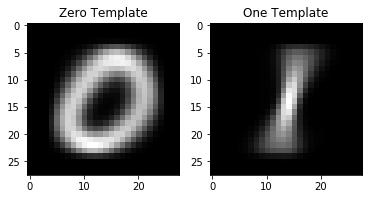

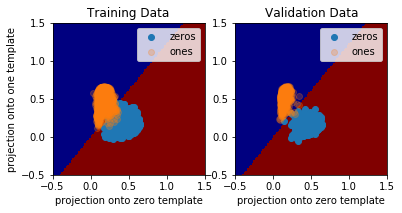

In [4]:
import numpy as np
from loadMNIST import LoadMNIST
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

####################
## DEFINE HELPERS ##
####################

# Define a class for retrieving MNIST data
class MNISTData(object):
    
    def __init__(self,path=os.getcwd()):
        save_stdout = sys.stdout
        sys.stdout = open(os.devnull, "w") #prevent LoadMNIST from printing to stdout
        self.mnist_trn_data = LoadMNIST(path + 'train-images-idx3-ubyte')
        self.mnist_val_data = LoadMNIST(path + 't10k-images-idx3-ubyte')
        self.mnist_trn_label = LoadMNIST(path + 'train-labels-idx1-ubyte')
        self.mnist_val_label = LoadMNIST(path + 't10k-labels-idx1-ubyte')
        sys.stdout = save_stdout #reset stdout
        
    def getTrainingSet(self, val):
        return self.normalizeSet(self.mnist_trn_data[self.mnist_trn_label==val].astype('float32'))
    
    def getValidationSet(self, val):
        return self.normalizeSet(self.mnist_val_data[self.mnist_val_label==val].astype('float32'))
    
    def getSetSize(self, valueSet):
        return valueSet.shape[0]
    
    def getPixelRes(self, valueSet):
        return valueSet.shape[1]
    
    def normalizeSet(self, imageSet):
        imageSet -= np.mean(imageSet, axis=(1,2))[:, np.newaxis, np.newaxis]
        imageSet /= np.sqrt(np.sum(imageSet**2,axis=(1,2)))[:, np.newaxis, np.newaxis]
        return imageSet
    
# Define discriminant function
def discriminant_function(data, weight, bias):
    return (weight.dot(data) + bias) > 0

# Define view class
def view_class(weight_vector, bias, view_bounds=(-.5,1.5), view_res=100):
    ##construct a viewing plane
    X,Y = np.meshgrid(np.linspace(view_bounds[0],view_bounds[1],num=view_res),
                      np.linspace(view_bounds[0],view_bounds[1],num=view_res))
    
    points = np.array([X.ravel(),Y.ravel()]) ##2 x view_res**2
    
    ##evaluate discriminate function
    disc = discriminant_function(points,weight_vector,bias)
    
    ##reshape disc. function values into a matrix and view
    plt.pcolor(X,Y,disc.reshape((view_res,view_res)),cmap='jet')
    plt.gca().set_aspect('equal', adjustable='box')

    
#####################
### RETRIEVE DATA ###
#####################

# Initialize MNIST Data Retrieval class
loader = MNISTData(os.getcwd() + '/MNIST/')

# Retrieve normalized training and validation data
trn_zeros = loader.normalizeSet(loader.getTrainingSet(0))
val_zeros = loader.normalizeSet(loader.getValidationSet(0))
trn_ones = loader.normalizeSet(loader.getTrainingSet(1))
val_ones = loader.normalizeSet(loader.getValidationSet(1))


#####################
##### TEMPLATES #####
#####################

# Templates from mean
one_temp = np.mean(trn_ones, axis=(0))
zero_temp = np.mean(trn_zeros, axis=(0))

# Reshape the templates and stack them into a matrix
temps = np.array([zero_temp.ravel(), one_temp.ravel()]).T

# Project images onto each of the templates
trn_phi_s_zeros = trn_zeros.reshape(loader.getSetSize(trn_zeros), loader.getPixelRes(trn_zeros)**2).dot(temps)
val_phi_s_zeros = val_zeros.reshape(loader.getSetSize(val_zeros), loader.getPixelRes(val_zeros)**2).dot(temps)
trn_phi_s_ones = trn_ones.reshape(loader.getSetSize(trn_ones), loader.getPixelRes(trn_ones)**2).dot(temps)
val_phi_s_ones = val_ones.reshape(loader.getSetSize(val_ones), loader.getPixelRes(val_ones)**2).dot(temps)


#####################
# DISPLAY TEMPLATES #
#####################

# display zero template
plt.figure()
plt.subplot(1,2,1).set_title('Zero Template')
plt.imshow(zero_temp,cmap='gray')

# display one template
plt.subplot(1,2,2).set_title('One Template')
plt.imshow(one_temp, cmap='gray')


####################
## GET W and BIAS ##
####################

# brute force optimization of w
num_steps = 100
w_1_range = np.linspace(-1, 1, num=num_steps)
w_2_range = np.linspace(-1, 1, num=num_steps)
b = 0.0
trn_performance = np.zeros([num_steps]*2)
for ii,w1 in enumerate(w_1_range):
    for jj,w2 in enumerate(w_2_range):
        w = np.array([w1, w2])
        zero_preds = discriminant_function(trn_phi_s_zeros.T, w, b)
        one_preds = discriminant_function(trn_phi_s_ones.T, w, b)
        trn_zero_correct = np.sum(zero_preds==True)/float(len(zero_preds))
        trn_one_correct = np.sum(one_preds==False)/float(len(one_preds))
        trn_performance[ii,jj] = (trn_zero_correct + trn_one_correct)/2
        
# get the best w
best_idx = np.unravel_index(trn_performance.argmax(), trn_performance.shape)
w = np.array((w_1_range[best_idx[0]],w_2_range[best_idx[1]]))

# display best w
print 'OPTIMIZED W'
print 'w = (%0.2f, %0.2f)' %(w[0], w[1])

######################
# VIEW TRAINING DATA #
######################

plt.figure()

# create training data plot
plt.subplot(1,2,1).set_title('Training Data')

# create viewing plot
view_class(w, b)

# display training data points
plt.scatter(trn_phi_s_zeros[:,0], trn_phi_s_zeros[:,1], label='zeros', alpha=1)
plt.scatter(trn_phi_s_ones[:,0], trn_phi_s_ones[:,1], label='ones', alpha=0.25)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('projection onto zero template')
plt.ylabel('projection onto one template')


####################
## TRAINING STATS ##
####################

# make predictions
trn_zero_preds = discriminant_function(trn_phi_s_zeros.T, w, b)
trn_one_preds = discriminant_function(trn_phi_s_ones.T, w, b)

# calculate success rate
trn_zero_correct = np.sum(trn_zero_preds==True)/float(len(trn_zero_preds))
trn_one_correct = np.sum(trn_one_preds==False)/float(len(trn_one_preds))
total_correct = (trn_zero_correct + trn_one_correct)/2

# display results
print 'TRAINING DATA'
print 'percentage of correct zeros: %0.2f' %(trn_zero_correct)
print 'percentage of correct ones: %0.2f' %(trn_one_correct)
print 'total percent correct: %0.2f' %(total_correct)


########################
# VIEW VALIDATION DATA #
########################

# create validation data plot
plt.subplot(1,2,2).set_title('Validation Data')

# create viewing plot
view_class(w, b)

# display validation data points
plt.scatter(val_phi_s_zeros[:,0], val_phi_s_zeros[:,1], label='zeros', alpha=1)
plt.scatter(val_phi_s_ones[:,0], val_phi_s_ones[:,1], label='ones', alpha=0.25)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('projection onto zero template')


####################
# VALIDATION STATS #
####################

# make predictions
val_zero_preds = discriminant_function(val_phi_s_zeros.T, w, b)
val_one_preds = discriminant_function(val_phi_s_ones.T, w, b)

# calculate success rate
val_zero_correct = np.sum(val_zero_preds==True)/float(len(val_zero_preds))
val_one_correct = np.sum(val_one_preds==False)/float(len(val_one_preds))
total_correct = (val_zero_correct + val_one_correct)/2

# display results
print 'VALIDATION DATA'
print 'percentage of correct zeros: %0.2f' %(val_zero_correct)
print 'percentage of correct ones: %0.2f' %(val_one_correct)
print 'total percent correct: %0.2f' %(total_correct)

#### Exercise 5
Generalize the functions "discriminant_function" and "view_class" to the multi-class setting. Use these functions to hand code a $K=3$ classifer (e.g., 1's, 0's, and 2's). In order to make visualization possible, use only two template images (of your chosing) to define the feature space (i.e., $D=2$).

*Note*: Chances are you won't get very good performance in this $K > D$ setting. We might expect better performance when $K \geq D$, but that will require new methods, which we'll cover next time.

OPTIMIZED W
[[-0.25896073  2.34121946 -0.28253171]
 [-0.11530384 -0.50234287  1.88313283]
 [ 1.3704666  -1.83199374 -1.59512257]]
TRAINING DATA
percentage of correct zeros: 0.92
percentage of correct ones: 0.93
percentage of correct twos: 0.54
total percent correct: 0.80
VALIDATION DATA
percentage of correct zeros: 0.91
percentage of correct ones: 0.94
percentage of correct twos: 0.49
total percent correct: 0.78


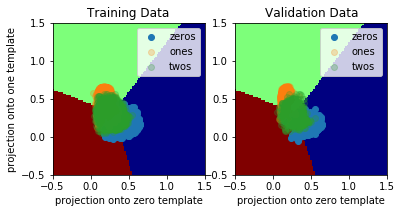

In [5]:
import numpy as np
from loadMNIST import LoadMNIST
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

####################
## DEFINE HELPERS ##
####################

# Define a class for retrieving MNIST data
class MNISTData(object):
    
    def __init__(self,path=os.getcwd()):
        save_stdout = sys.stdout
        sys.stdout = open(os.devnull, "w") #prevent LoadMNIST from printing to stdout
        self.mnist_trn_data = LoadMNIST(path + 'train-images-idx3-ubyte')
        self.mnist_val_data = LoadMNIST(path + 't10k-images-idx3-ubyte')
        self.mnist_trn_label = LoadMNIST(path + 'train-labels-idx1-ubyte')
        self.mnist_val_label = LoadMNIST(path + 't10k-labels-idx1-ubyte')
        sys.stdout = save_stdout #reset stdout
        
    def getTrainingSet(self, val):
        return self.normalizeSet(self.mnist_trn_data[self.mnist_trn_label==val].astype('float32'))
    
    def getValidationSet(self, val):
        return self.normalizeSet(self.mnist_val_data[self.mnist_val_label==val].astype('float32'))
    
    def getSetSize(self, valueSet):
        return valueSet.shape[0]
    
    def getPixelRes(self, valueSet):
        return valueSet.shape[1]
    
    def normalizeSet(self, imageSet):
        imageSet -= np.mean(imageSet, axis=(1,2))[:, np.newaxis, np.newaxis]
        imageSet /= np.sqrt(np.sum(imageSet**2,axis=(1,2)))[:, np.newaxis, np.newaxis]
        return imageSet
    
# Define discriminant function
def discriminant_function(data, weight):
    return weight.dot(data)

# Define cost function
def cost_function(T, X, W):
    diff = discriminant_function(X,W) - T
    return np.sum(np.sum(diff**2,axis=0))

# Define gradient function
def gradient(T, X, W):
    diff = discriminant_function(X,W) - T  ##K x N
    return diff.dot(X.T)  ##(K x N) (N x D)

# Define view class
def view_class(weight_vector, view_bounds=(-.5,1.5), view_res=100):
    ##construct a viewing plane
    X,Y = np.meshgrid(np.linspace(view_bounds[0],view_bounds[1],num=view_res),
                      np.linspace(view_bounds[0],view_bounds[1],num=view_res))
    
    points = np.array([X.ravel(),Y.ravel()]) ##2 x view_res**2
    points = np.concatenate([np.ones((1, view_res**2)), points]) #add 1 for the bias
    
    ##evaluate discriminate function
    disc = np.argmax(discriminant_function(points, weight_vector), axis=0)
    
    ##reshape disc. function values into a matrix and view
    plt.pcolor(X,Y,disc.reshape((view_res,view_res)),cmap='jet')
    plt.gca().set_aspect('equal', adjustable='box')

    
#####################
### RETRIEVE DATA ###
#####################

# Initialize MNIST Data Retrieval class
loader = MNISTData(os.getcwd() + '/MNIST/')

# Retrieve normalized training data
trn_zeros = loader.normalizeSet(loader.getTrainingSet(0))
trn_ones = loader.normalizeSet(loader.getTrainingSet(1))
trn_twos = loader.normalizeSet(loader.getTrainingSet(2))
trn_data = np.concatenate((trn_zeros, trn_ones, trn_twos))

# Create training labels
trn_labs = np.concatenate((
        np.full((trn_zeros.shape[0]), 0, dtype=int), 
        np.full((trn_ones.shape[0]), 1, dtype=int),
        np.full((trn_twos.shape[0]), 2, dtype=int)
    ))

# Retrieve normalized validation data
val_zeros = loader.normalizeSet(loader.getValidationSet(0))
val_ones = loader.normalizeSet(loader.getValidationSet(1))
val_twos = loader.normalizeSet(loader.getValidationSet(2))
val_data = np.concatenate((val_zeros, val_ones, val_twos))

# Create validation labels
val_labs = np.concatenate((
        np.full((val_zeros.shape[0]), 0, dtype=int), 
        np.full((val_ones.shape[0]), 1, dtype=int),
        np.full((val_twos.shape[0]), 2, dtype=int)
    ))


#####################
##### TEMPLATES #####
#####################

# Templates from mean
one_temp = np.mean(trn_ones, axis=(0))
zero_temp = np.mean(trn_zeros, axis=(0))

# Reshape the templates and stack them into a matrix
temps = np.array([zero_temp.ravel(), one_temp.ravel()]).T

# Project images onto each of the templates
trn_features = trn_data.reshape(loader.getSetSize(trn_data), loader.getPixelRes(trn_data)**2).dot(temps).T
val_features = val_data.reshape(loader.getSetSize(val_data), loader.getPixelRes(val_data)**2).dot(temps).T


#####################
## GD OPTIMIZATION ##
#####################

# Prepare the feature data by appending 1 to each of the data samples
X_trn = np.concatenate([np.ones((1,trn_features.shape[1])), trn_features])
X_val = np.concatenate([np.ones((1,val_features.shape[1])), val_features])

# Prepare the target data
T_trn = np.zeros((3, X_trn.shape[1]))
T_val = np.zeros((3, X_val.shape[1]))
T_trn[list(trn_labs), list(np.arange(X_trn.shape[1]).astype('int'))] = 1
T_val[list(val_labs), list(np.arange(X_val.shape[1]).astype('int'))] = 1

# Random starting point
W_new = np.random.randn(3, 3)

# initialize variables
delta = 0.00001
stop = 10e-4
max_i = 10000

# calculate the initial cost
L_old = np.inf 
L_new = cost_function(T_trn, X_trn, W_new)

# train the model
i = 0
while (i <= max_i) & ((L_old - L_new) > stop):
    W_grad = gradient(T_trn, X_trn, W_new)
    W_new -= W_grad*delta
    L_old = np.copy(L_new)
    L_new = cost_function(T_trn, X_trn, W_new)
    i += 1
    
print 'OPTIMIZED W'
print W_new

######################
# VIEW TRAINING DATA #
######################

plt.figure()

# create training data plot
plt.subplot(1,2,1).set_title('Training Data')


# create viewing plot
view_class(W_new)

# display training data points
plt.scatter(trn_features[:,trn_labs==0][0,:], trn_features[:,trn_labs==0][1,:], label='zeros', alpha=1)
plt.scatter(trn_features[:,trn_labs==1][0,:], trn_features[:,trn_labs==1][1,:], label='ones', alpha=0.25)
plt.scatter(trn_features[:,trn_labs==2][0,:], trn_features[:,trn_labs==2][1,:], label='twos', alpha=0.25)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('projection onto zero template')
plt.ylabel('projection onto one template')


####################
## TRAINING STATS ##
####################

# make predictions
trn_preds = np.argmax(discriminant_function(X_trn, W_new), axis=0)
correct = trn_preds[trn_preds == trn_labs]

# calculate success rate
trn_zero_correct = len(correct[correct==0])/float(len(trn_labs[trn_labs==0]))
trn_one_correct = len(correct[correct==1])/float(len(trn_labs[trn_labs==1]))
trn_two_correct = len(correct[correct==2])/float(len(trn_labs[trn_labs==2]))
total_correct = (trn_zero_correct + trn_one_correct + trn_two_correct)/3

# display results
print 'TRAINING DATA'
print 'percentage of correct zeros: %0.2f' %(trn_zero_correct)
print 'percentage of correct ones: %0.2f' %(trn_one_correct)
print 'percentage of correct twos: %0.2f' %(trn_two_correct)
print 'total percent correct: %0.2f' %(total_correct)


########################
# VIEW VALIDATION DATA #
########################

# create validation data plot
plt.subplot(1,2,2).set_title('Validation Data')

# create viewing plot
view_class(W_new)

# display validation data points
plt.scatter(val_features[:,val_labs==0][0,:], val_features[:,val_labs==0][1,:], label='zeros', alpha=1)
plt.scatter(val_features[:,val_labs==1][0,:], val_features[:,val_labs==1][1,:], label='ones', alpha=0.25)
plt.scatter(val_features[:,val_labs==2][0,:], val_features[:,val_labs==2][1,:], label='twos', alpha=0.25)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('projection onto zero template')


####################
# VALIDATION STATS #
####################

# # make predictions
val_preds = np.argmax(discriminant_function(X_val, W_new), axis=0)
correct = val_preds[val_preds == val_labs]

# calculate success rate
val_zero_correct = len(correct[correct==0])/float(len(val_labs[val_labs==0]))
val_one_correct = len(correct[correct==1])/float(len(val_labs[val_labs==1]))
val_two_correct = len(correct[correct==2])/float(len(val_labs[val_labs==2]))
total_correct = (val_zero_correct + val_one_correct + val_two_correct)/3

# display results
print 'VALIDATION DATA'
print 'percentage of correct zeros: %0.2f' %(val_zero_correct)
print 'percentage of correct ones: %0.2f' %(val_one_correct)
print 'percentage of correct twos: %0.2f' %(val_two_correct)
print 'total percent correct: %0.2f' %(total_correct)

#### Exercise 6
Write a function to calculate the gradient for a toy-example cost function defined:

$L(\mathbf{w}) = \mathbf{w} \cdot \mathbf{w} $, where $\mathbf{w}$ is $2D$ weight vector.


Write some code that descends to the bottom of this cost function. Plot the cost function trajectory in the $2D$ plane, just as we did for the $1D$ case in the "Simple_gradient_descent_illustration" notebook. Show what happens when the step-size is "small enough" and when it is "too large".

#### Exercise 7
In the "Optimal_multi_class" notebook, we trained a linear classifer with using a $D=10$ dimensional template-based feature space, and $K=60,000$ training samples. In this setting, validation peformance was *much* better than chance, but still pretty far from perfect. One natural question to ask is: what digits does our classifier most often confuse? We can answer this question by calculating a "confusion matrix". Each element of this symmetric matrix gives the 2-way discrimination peformance for each pair of digits. By summing along the diagonal of the confusion matrix we obtain the total validation performance.

Write a function to calculate the confusion matrix. For the simple linear classifier we trained in "Optimal_multi_class" notebook, what digits are most difficult to discriminate?

#### Execercise 8
One way that we might improve our classifier is to use a feature space with more dimensions. Currenly, our feature space relies upon the similarity between many thousands of images and small set of templates. As we saw above, the distributions of these features do not seem to separate into distinct clusters. 

However, if we increase the dimensions of our model, we expose our model to the risk of overfitting.

In this excerise we will learn how to control overfitting via *regularization*. Regularization is a term that refers to any added constraint to the training or added cost. In this case, we'll consider a simple and powerful form or regularization known as *early-stopping*. In early stopping, we subdivide our training data into a gradient set and an early stopping set. We use the gradient set to calculate the gradient, but we use the early-stopping set to calculate the cost. We will stop training when the cost evaluated on the early stopping set begins to rise. That is the point at which our model is learning something about the gradient set that does not generalize to the rest of the samples.

Build a series of classifiers that uses increasing numbers of images as templates. Start with using two images per digit, and then scale up from there. To make this excercise instructive, use only a subset of 100 randomly selected training images. First, train the classifier without early stopping.

Without early stopping, for what number of features does the classifier begin to overfit?

Now, train the classifier with early stopping? How many feature dimensions before we start to overfit? Is there an improvement in validation peformance as the number of feature increases?